# Key Concepts 

#### GHI (Global Horizontal Irradiance) [W/m2]: 
Se refiere a la radiación solar total recibida por la superficie horizontal de la Tierra, incluyendo la radiación directa del sol, la radiación difusa (reflejada por la atmósfera) y la radiación del cielo nublado.
#### DNI (Direct Normal Irradiance) [W/m2]: 
Es la cantidad de radiación solar directa recibida por un panel solar colocado perpendicularmente al sol. No incluye la radiación difusa ni la radiación reflejada.
#### DHI (Diffuse Horizontal Irradiance) [W/m2]: 
Se refiere a la radiación solar difusa que llega a la superficie de la Tierra proveniente de todas las direcciones del cielo, excepto la radiación directa del sol.

## GHI=DNI⋅cos(ángulo Solar)+DHI

## Potencia Generada por un sistema fotovoltaico
Potencia (W)=Radiación Solar (W/m 2 )×Eficiencia del Panel Solar× Area del Panel Solar (m 2 )

<img src="../../Visualizations/img/areas.png" width="50%">

## Import Libraries

In [1]:
import numpy as np            # manejo arreglos
import pandas as pd           # manipulación dataframes      
import matplotlib.pyplot as plt    # Realiza graficas
import pytz                        # manipulación de zonas horarias                     
from datetime import datetime, date, timedelta  # manipulacion de fechas y horas

## Def Solar Power 

In [ ]:
# Metodo que calcule la potencia a partirt del valor de GHI relacioando: Potencia (W)=Radiación Solar (W/m 2 )×Eficiencia del Panel Solar× Area del Panel Solar (m 2 )
def potencia(ghi, eficiencia, area):
    return ghi * eficiencia * area

# Metodo que calcule la energía a partir de la potencia y el tiempo en horas
def energia(potencia, tiempo):
    return potencia * tiempo


## Import CSV Fronius 01-01-2023


In [2]:
# leer el archivo csv en la ruta Data/Processed/SFV_13-02-2023.csv
df = pd.read_csv('../../Data/Processed/SFV_13-02-2023.csv')

# nuevo dataframe con las columnas de hora y producción fotovoltaica
df_SFV = df[['Hora', 'Producción fotovoltaica']]


# # Buscar el valor '11:40' en la columna 'Hora'
# selected_rows = df_SFV.loc[df_SFV['Hora'] == '06:45']
# print(selected_rows)



## Potencia [W]

In [3]:
import numpy as np

# calcula potencia dividiendo la producción fotovoltaica entre 5 minutos
df_SFV['Potencia'] = df_SFV['Producción fotovoltaica'] / (5/60)
print(df_SFV)




      Hora  Producción fotovoltaica  Potencia
0    00:00                      0.0       0.0
1    00:05                      0.0       0.0
2    00:10                      0.0       0.0
3    00:15                      0.0       0.0
4    00:20                      0.0       0.0
..     ...                      ...       ...
283  23:35                      0.0       0.0
284  23:40                      0.0       0.0
285  23:45                      0.0       0.0
286  23:50                      0.0       0.0
287  23:55                      0.0       0.0

[288 rows x 3 columns]


/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_4472/4195564100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SFV['Potencia'] = df_SFV['Producción fotovoltaica'] / (5/60)


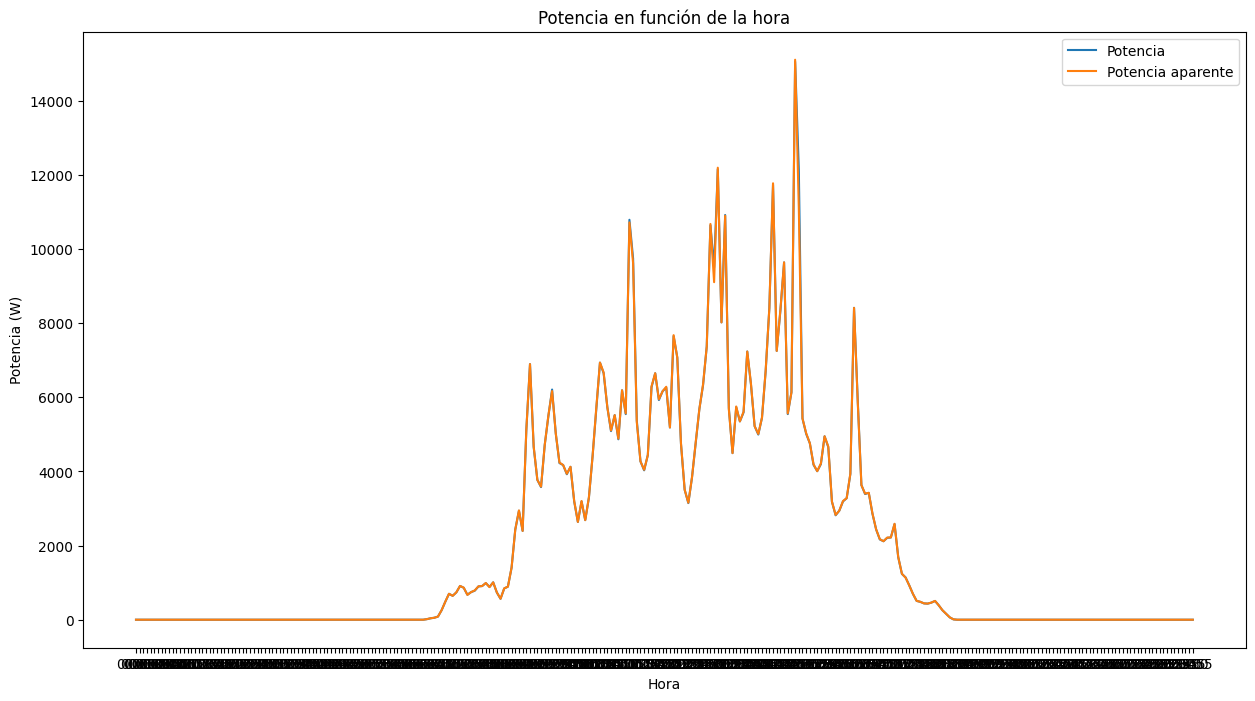

In [4]:
# # Graficar la potencia en función de la hora
plt.figure(figsize=(15,8))
plt.plot(df_SFV['Hora'], df_SFV['Potencia'], label='Potencia')
plt.plot(df['Hora'] ,df['Potencia aparente | FRONIUS Symo 15.0-3 208 (1)'], label='Potencia aparente')
plt.xlabel('Hora')
plt.ylabel('Potencia (W)')
plt.title('Potencia en función de la hora')
plt.legend()
plt.show()


## Grafico producción fotovoltaica Fronius

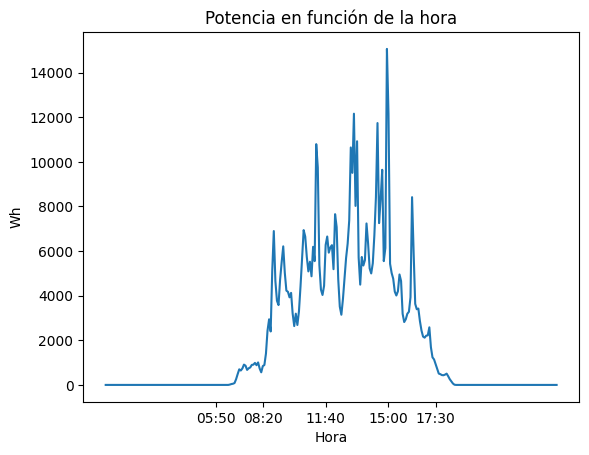

In [5]:
# Graficar la producción fotovoltaica en función de la hora
plt.plot(df_SFV['Hora'], df_SFV['Potencia'])
plt.xlabel('Hora')
plt.ylabel('Wh')
plt.title('Potencia en función de la hora')
plt.xticks([70,100,140,180,210])  
plt.show()


## Irradiancia calculada 

In [6]:
eficiencia = 0.2094
catidad_pv= 30
area =2.274*1.134

potencia_pv= df_SFV['Potencia']

Irr=potencia_pv/(eficiencia*area*catidad_pv)
# print(Irr)
# agregar Irrr en df_SFV
df_SFV['Irr'] = Irr
print(df_SFV)

      Hora  Producción fotovoltaica  Potencia  Irr
0    00:00                      0.0       0.0  0.0
1    00:05                      0.0       0.0  0.0
2    00:10                      0.0       0.0  0.0
3    00:15                      0.0       0.0  0.0
4    00:20                      0.0       0.0  0.0
..     ...                      ...       ...  ...
283  23:35                      0.0       0.0  0.0
284  23:40                      0.0       0.0  0.0
285  23:45                      0.0       0.0  0.0
286  23:50                      0.0       0.0  0.0
287  23:55                      0.0       0.0  0.0

[288 rows x 4 columns]


/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_4472/219400591.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SFV['Irr'] = Irr


## Graph Irr

Irradicancia calculada a partir de la producción del pv

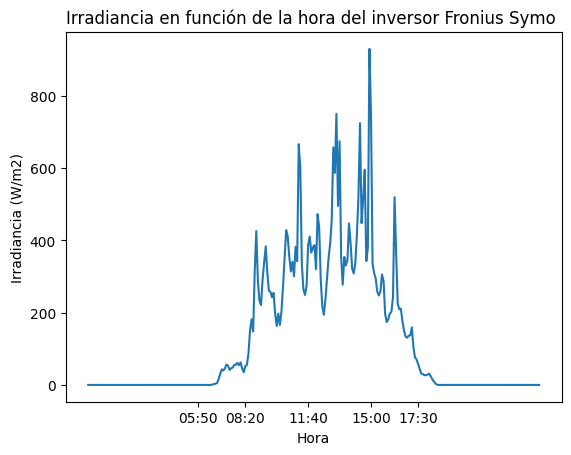

In [7]:
# Graficar la Irradiación en función de la hora
plt.plot(df_SFV['Hora'], df_SFV['Irr'])
plt.xlabel('Hora')
plt.ylabel('Irradiancia (W/m2)')
plt.title('Irradiancia en función de la hora del inversor Fronius Symo ')
plt.xticks([70,100,140,180,210])
plt.show()


In [ ]:
# Cuantos datos hay en la columna 'Hora' que sean '11:'
selected_rows = df_SFV.loc[df_SFV['Hora'].str.contains('11:')]
print(selected_rows)


## Import CSV Solcast 13-02-2023

In [8]:
# Leer CSV solcast_13-02-2023.csv
df_solcast = pd.read_csv('../../Data/Processed/solcast_13-02-2023_PT5M.csv')
# Eliminar el primer carácter de 'Time'
df_solcast['Time'] = df_solcast['Time'].str.slice(1)
print(df_solcast)

     dhi  DHI  GHI            period_end period        Date   Time
0      0    0    0  2023-02-13T00:00:00Z   PT5M  2023-02-13  19:00
1      0    0    0  2023-02-13T00:05:00Z   PT5M  2023-02-13  19:05
2      0    0    0  2023-02-13T00:10:00Z   PT5M  2023-02-13  19:10
3      0    0    0  2023-02-13T00:15:00Z   PT5M  2023-02-13  19:15
4      0    0    0  2023-02-13T00:20:00Z   PT5M  2023-02-13  19:20
..   ...  ...  ...                   ...    ...         ...    ...
283    0    0    0  2023-02-13T23:35:00Z   PT5M  2023-02-13  18:35
284    0    0    0  2023-02-13T23:40:00Z   PT5M  2023-02-13  18:40
285    0    0    0  2023-02-13T23:45:00Z   PT5M  2023-02-13  18:45
286    0    0    0  2023-02-13T23:50:00Z   PT5M  2023-02-13  18:50
287    0    0    0  2023-02-13T23:55:00Z   PT5M  2023-02-13  18:55

[288 rows x 7 columns]


## Data correlation

In [9]:
# Crear un nuevo DataFrame vacío
new_df = pd.DataFrame()

# Iterar sobre cada valor en 'Time'
for time in df_solcast ['Time']:
    # Buscar el valor en 'Hora' y guardar las filas correspondientes en el nuevo DataFrame
    matching_rows = df_SFV[df_SFV['Hora'] == time]
    new_df = pd.concat([new_df, matching_rows])

print(new_df)

      Hora  Producción fotovoltaica  Potencia       Irr
228  19:00                     0.00      0.00  0.000000
229  19:05                     0.00      0.00  0.000000
230  19:10                     0.00      0.00  0.000000
231  19:15                     0.00      0.00  0.000000
232  19:20                     0.00      0.00  0.000000
..     ...                      ...       ...       ...
223  18:35                     0.01      0.12  0.007408
224  18:40                     0.00      0.00  0.000000
225  18:45                     0.00      0.00  0.000000
226  18:50                     0.00      0.00  0.000000
227  18:55                     0.00      0.00  0.000000

[288 rows x 4 columns]


## Graph Comparison of irradiances (Fronius vs Solcast)

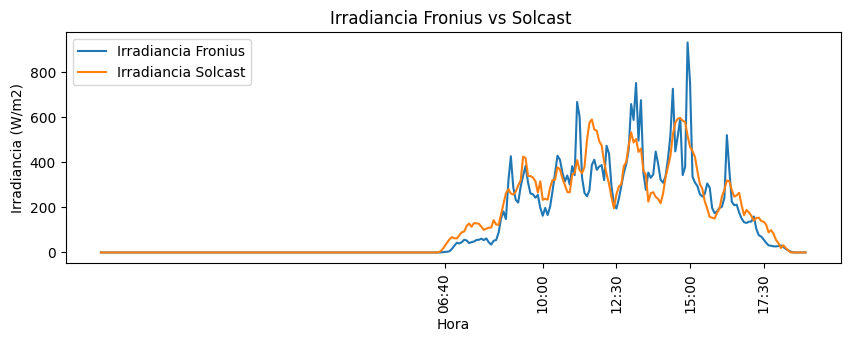

In [10]:
#graficar  Irr en new_df
plt.figure(figsize=(10,3))
plt.plot(new_df['Hora'], new_df['Irr'], label='Irradiancia Fronius')
#agregar grafica de  GHI de df_solcast
plt.plot(df_solcast['Time'], df_solcast['GHI'], label='Irradiancia Solcast')


plt.xlabel('Hora')
plt.ylabel('Irradiancia (W/m2)')
plt.title('Irradiancia Fronius vs Solcast ')
plt.xticks([140,180,210,240,270])
plt.xticks(rotation=90)
plt.legend()
plt.show()


## Import CSV Solargis 13-02-2023

In [11]:
# Leer CSV solgis_13-02-2023.csv
df_solargis = pd.read_csv('../../Data/Processed/solargis_13-02-2023.csv')
# Eliminar el primer carácter de 'Time'
df_solargis['Time'] = df_solargis['Time'].str.slice(1)
print(df_solargis.head())
print(df_solcast.shape)


         Date  GHI  DNI  DHI  TEMP   WS  WD  flagR     SE     SA    RH     AP  \
0  13.02.2023    0    0    0  15.6  0.6  83      0 -10.37  76.71  89.1  745.4   
1  13.02.2023    0    0    0  15.5  0.7  87      0 -12.81  76.65  89.5  745.6   
2  13.02.2023    0    0    0  15.5  0.7  91      0 -15.24  76.56  89.7  745.7   
3  13.02.2023    0    0    0  15.5  0.7  95      0 -17.66  76.44  90.0  745.8   
4  13.02.2023    0    0    0  15.4  0.8  98      0 -20.09  76.29  90.2  746.0   

   PWAT   WG  PREC   Time  
0  21.2  3.7   0.0  19:05  
1  21.2  3.7   0.0  19:15  
2  21.1  3.7   0.0  19:25  
3  21.1  4.1   0.0  19:35  
4  21.1  4.1   0.0  19:45  
(288, 7)


## Data correlation

In [12]:
# Crear un nuevo DataFrame vacío
new_df_SVF = pd.DataFrame()

# Iterar sobre cada valor en 'Time'
for time in df_solargis ['Time']:
    # Buscar el valor en 'Hora' y guardar las filas correspondientes en el nuevo DataFrame
    matching_rows = df_SFV[df_SFV['Hora'] == time]
    new_df_SVF = pd.concat([new_df_SVF, matching_rows])

print(new_df_SVF.head())
print(new_df_SVF.shape)

      Hora  Producción fotovoltaica  Potencia  Irr
229  19:05                      0.0       0.0  0.0
231  19:15                      0.0       0.0  0.0
233  19:25                      0.0       0.0  0.0
235  19:35                      0.0       0.0  0.0
237  19:45                      0.0       0.0  0.0
(144, 4)


In [13]:
# Crear un nuevo DataFrame vacío
new_df_solcast = pd.DataFrame()

# Iterar sobre cada valor en 'Time'
for time in df_solargis ['Time']:
    # Buscar el valor en 'Hora' y guardar las filas correspondientes en el nuevo DataFrame
    matching_rows = df_solcast[df_solcast['Time'] == time]
    new_df_solcast = pd.concat([new_df_solcast, matching_rows])

print(new_df_solcast.head())
print(new_df_solcast.shape)

   dhi  DHI  GHI            period_end period        Date   Time
1    0    0    0  2023-02-13T00:05:00Z   PT5M  2023-02-13  19:05
3    0    0    0  2023-02-13T00:15:00Z   PT5M  2023-02-13  19:15
5    0    0    0  2023-02-13T00:25:00Z   PT5M  2023-02-13  19:25
7    0    0    0  2023-02-13T00:35:00Z   PT5M  2023-02-13  19:35
9    0    0    0  2023-02-13T00:45:00Z   PT5M  2023-02-13  19:45
(144, 7)


## Graph comparation SVF - Solargis - Solcast

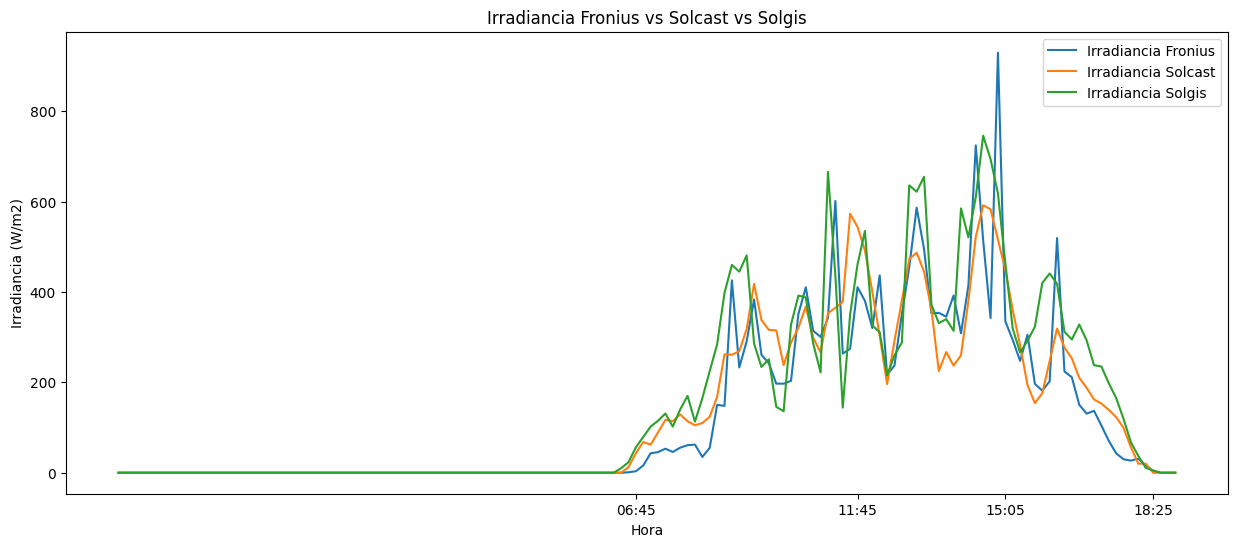

In [18]:
#graficar  Irr en new_df
plt.figure(figsize=(15,6))
plt.plot(new_df_SVF['Hora'], new_df_SVF['Irr'], label='Irradiancia Fronius')
#agregar grafica de  GHI de df_solcast
plt.plot(new_df_solcast['Time'], new_df_solcast['GHI'], label='Irradiancia Solcast')
# #agregar grafica de  GHI de df_solargis
plt.plot(df_solargis['Time'], df_solargis['GHI'], label='Irradiancia Solgis')


plt.xlabel('Hora')
plt.ylabel('Irradiancia (W/m2)')
plt.title('Irradiancia Fronius vs Solcast vs Solgis')
plt.xticks([70,100,120,140])
# plt.xticks(rotation=90, size=3)
plt.legend()
plt.show()

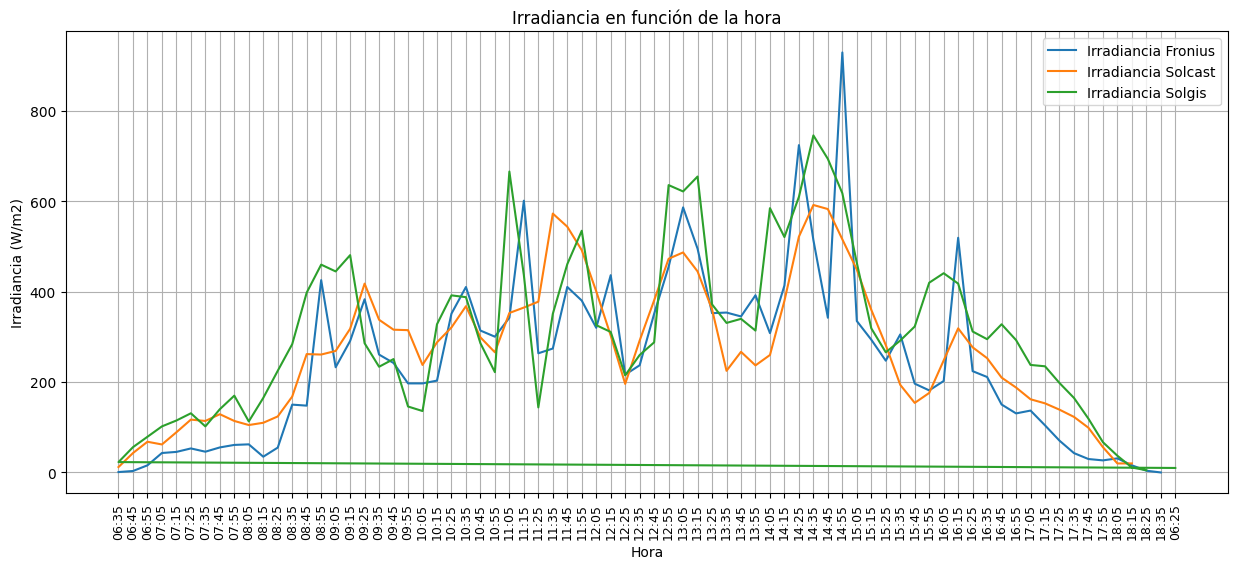

In [19]:
#valores diferentes a 0 en new_df_SVF, new_df_solcast y df_solargis
df_filtered_solcast = new_df_solcast[new_df_solcast['GHI'] != 0]
df_filtered_solargis = df_solargis[df_solargis['GHI'] != 0]
df_filtered_SVF = new_df_SVF[new_df_SVF['Irr'] != 0]

# Graficar la Irradiancia en función de la hora
plt.figure(figsize=(15,6))
plt.plot(df_filtered_SVF['Hora'], df_filtered_SVF['Irr'], label='Irradiancia Fronius')
plt.plot(df_filtered_solcast['Time'], df_filtered_solcast['GHI'], label='Irradiancia Solcast')
plt.plot(df_filtered_solargis['Time'], df_filtered_solargis['GHI'], label='Irradiancia Solgis')
plt.xlabel('Hora')
plt.ylabel('Irradiancia (W/m2)')
plt.title('Irradiancia en función de la hora')
# plt.xticks([70,100,120,140])
# agregar cuadricula
plt.grid()
plt.xticks(rotation=90, size=9)
plt.legend()
plt.show()





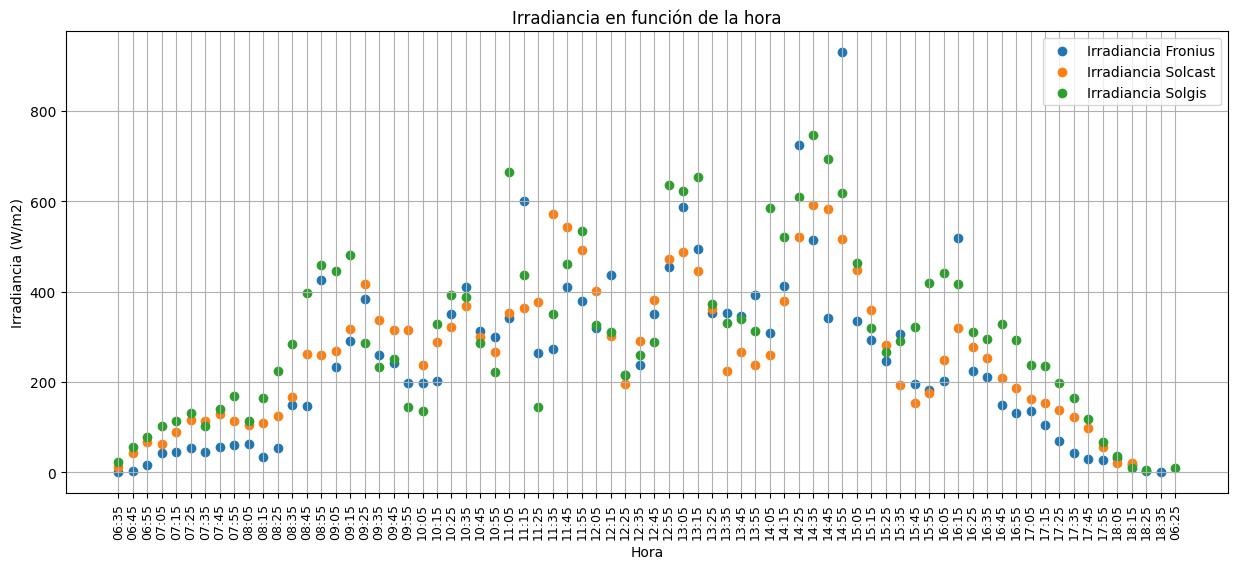

In [22]:
# grafica con puntos
plt.figure(figsize=(15,6))
plt.scatter(df_filtered_SVF['Hora'], df_filtered_SVF['Irr'], label='Irradiancia Fronius')
plt.scatter(df_filtered_solcast['Time'], df_filtered_solcast['GHI'], label='Irradiancia Solcast')
plt.scatter(df_filtered_solargis['Time'], df_filtered_solargis['GHI'], label='Irradiancia Solgis')
plt.xlabel('Hora')
plt.ylabel('Irradiancia (W/m2)')
plt.title('Irradiancia en función de la hora')
# plt.xticks([70,100,120,140])
plt.xticks(rotation=90, size=9)
# agregar cuadricula
plt.grid()
plt.legend()
plt.show()